# CV Assignment 4 
## "GrabCut" — Interactive Foreground Extraction using Iterated Graph Cuts
[Link to Paper](https://cvg.ethz.ch/teaching/cvl/2012/grabcut-siggraph04.pdf "GrabCut Paper")

# Implementation
A GUI program to display the result from a image segmentation algorithm named  

This program is a course project during my second year in university, so some functions in outdated libraries may be not supported by the newest libraries.

##### Requirements
```
​	python3.5
​	matplotlib
​	OpenCV
​	scikit-learn
​	PIL
​	wxPython
​	igraph
```
​	**Note**: To install igraph library , run **pip install python-igraph**. Do **not** run **pip install igraph**
   
   **Note**: To install wxPython library on GTK 3, Ubuntu 16.04 , run **pip3.5 install -U -f https://extras.wxpython.org/wxPython4/extras/linux/gtk3/ubuntu-16.04 wxPython**

## Usage
### Run
```
    python main.py
```
### Organization
```
./
./code
    ./GrabCut
        |--grab.py - call the GrabCut function in OpenCV.
        |--grabcut.py - use igraph(mincut) and scikit-learn(GMM) to implement GrabCut function.
        |--main.py - build the GUI architecture by wxPython.
    ./mrf

./report
    |--Assignment.pdf - Question Details
    |--Report.pdf - Report on the current Implementation
    |--Report.ipynb - Notebook for generating report

./examples/
    |--bboxes - Bounding Boxes for each image
    |--images - Images
    

```

## Analysis of GrabCut
    Now that we have created a GUI we want to analyze the impact of various parameters on GrabCut. 
    We focus on
        - Iterations 
        - Number of componenets for GMM
        - Color Space
        - 4 Neigbourhood vs 8 Neighbourhood

    Note:- For each example we will use 5 images

In [1]:
%load_ext autoreload
%autoreload 2
# Imports 
import os 
import sys
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Define Dirs 
image_dir = '../examples/images/'
bbox_dir = '../examples/bboxes/'

In [3]:
# Load all images and bbox 
img_list = []
for filename in os.listdir(image_dir):
    im = cv2.imread(os.path.join(image_dir,filename))
    bbox_file = filename.split('.')[0] + '.txt'
    with open(os.path.join(bbox_dir,bbox_file)) as f:
        mask_coord = [int(x) for x in f.read().split()]
    img_list.append((im,mask_coord))
print("Total Images:",len(img_list))
#     x1,y1,x2,y2 = mask_coord
#     plt.imshow(cv2.cvtColor(im[y1:y2,x1:x2,:], cv2.COLOR_BGR2RGB))
# #     plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
#     print(mask_coord,im.shape)
#     plt.axis('off')
#     plt.show()

Total Images: 30


## Number of Iterations

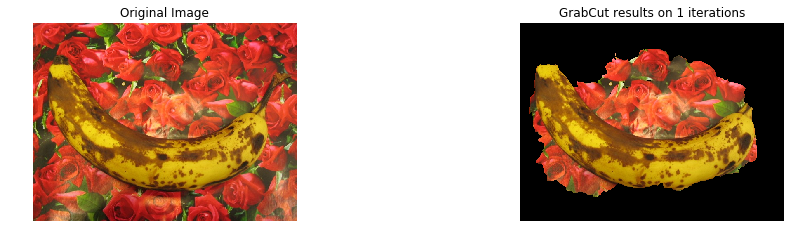

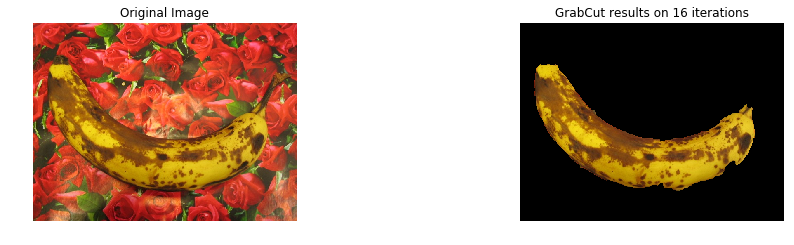

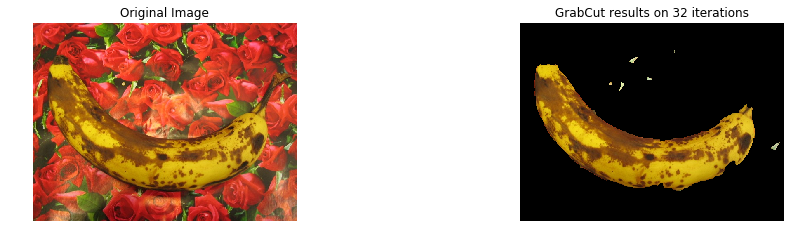

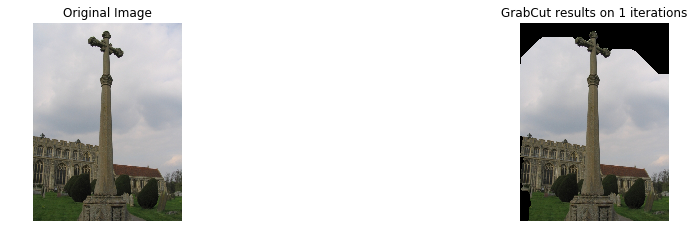

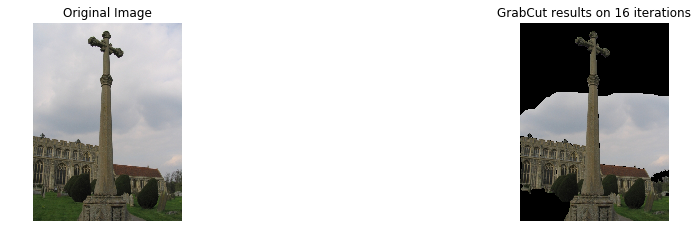

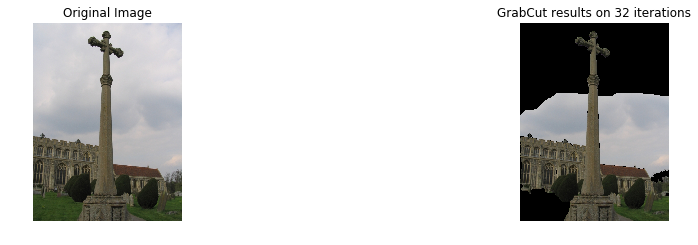

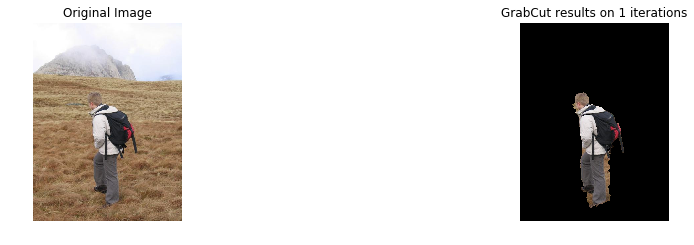

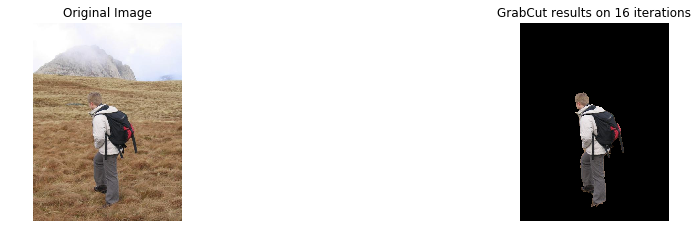

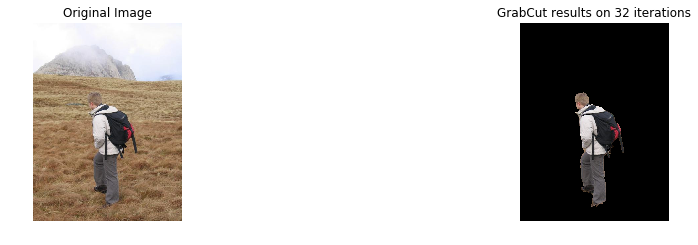

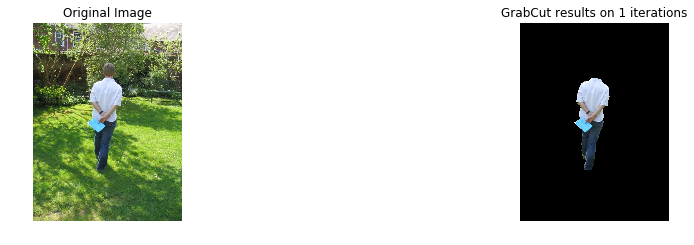

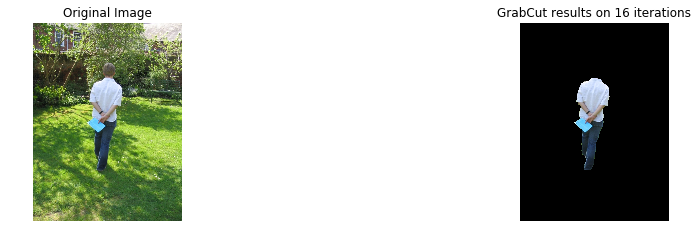

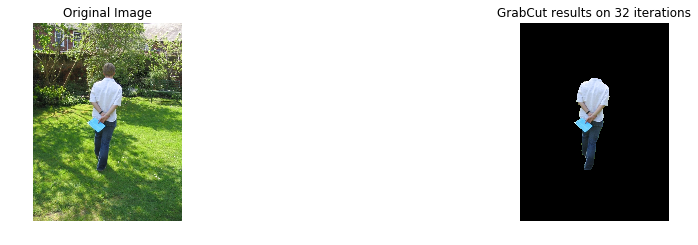

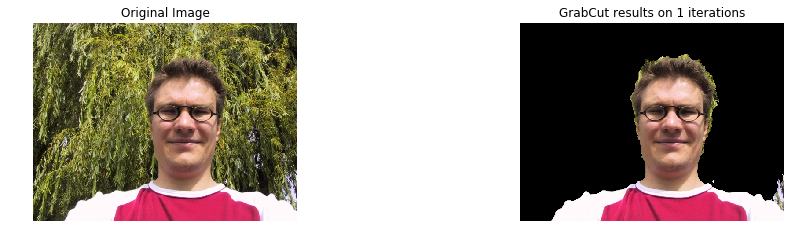

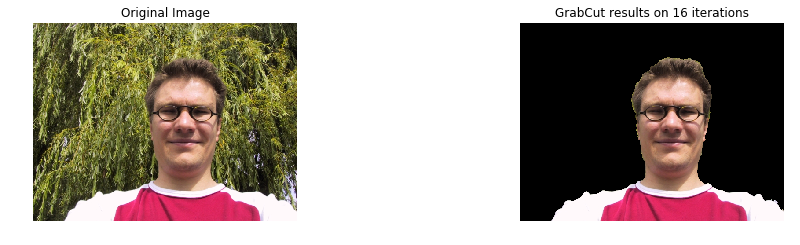

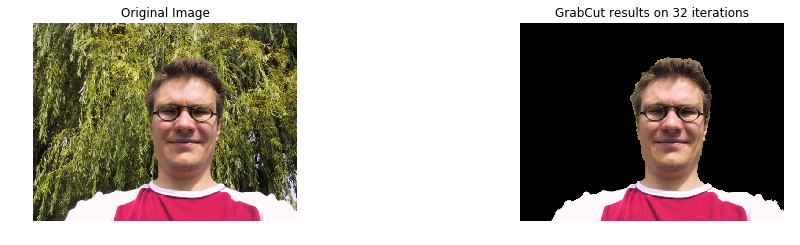

In [37]:
for img,coord in img_list[0:5]:    
    img = img.astype('uint8')
    x1,y1,x2,y2 = coord
    rect = (x1,y1,x2-x1,y2-y1)
    # Number of itersaions 
    for iterations in [1,16,32]:            
        #     Define mask
        mask = np.zeros(img.shape[:2],np.uint8)
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)
        
        mask, bgdModel, fgdModel = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,iterations,cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        seg_img = img*mask2[:,:,np.newaxis]

        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(2,2,1)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title('Original Image')
        
        ax = fig.add_subplot(2,2,2)
        ax.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title('GrabCut results on {} iterations'.format(iterations))
        
        plt.show()

We can see how by increasing the number of interations of the GMM we are better able to approximate the mincut 

# Color Space 
    We will try the following spaces 
    - RGB 
    - LAB 
    - YCrCb    

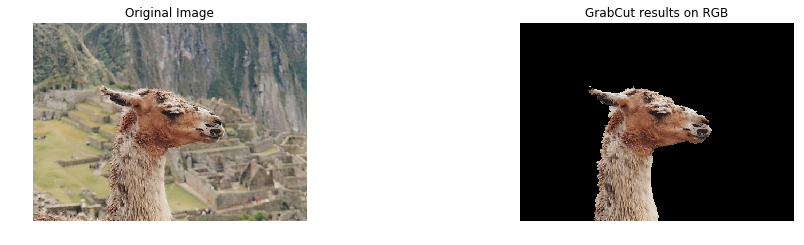

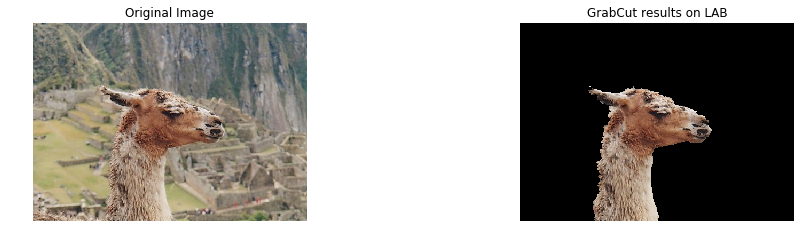

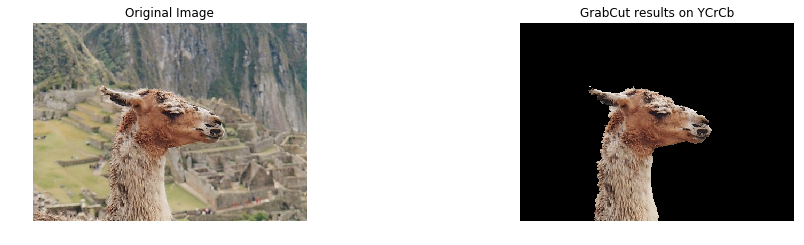

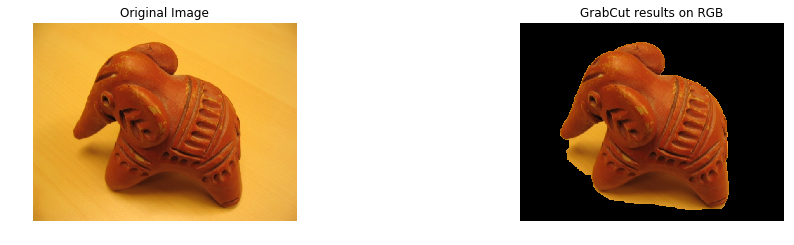

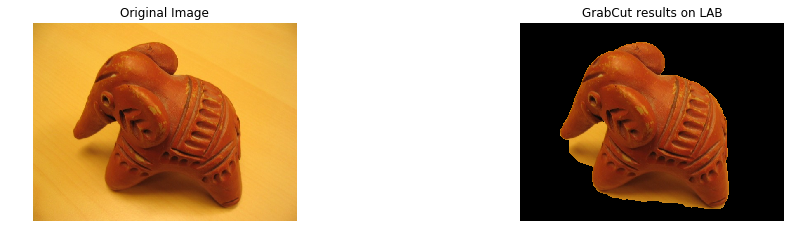

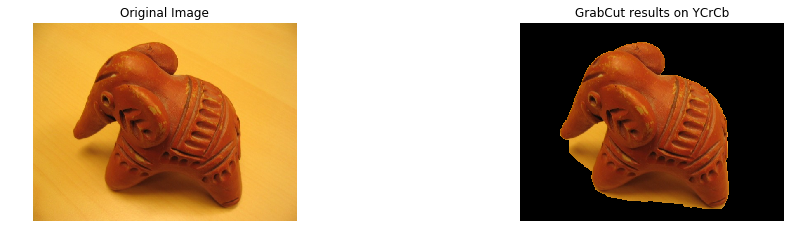

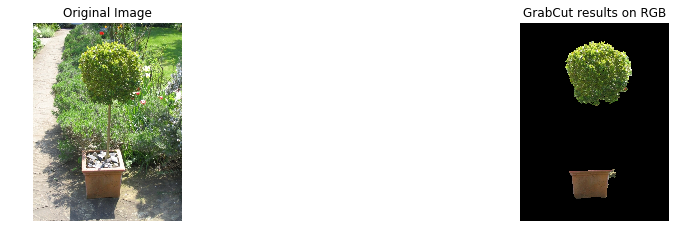

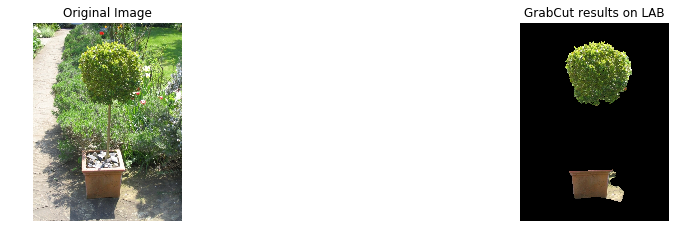

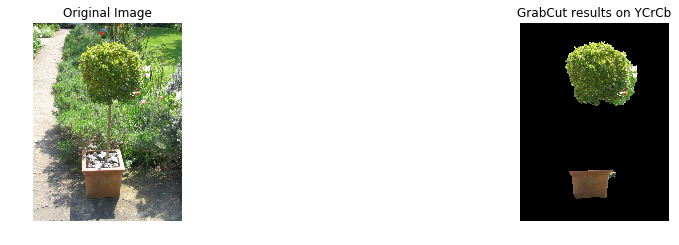

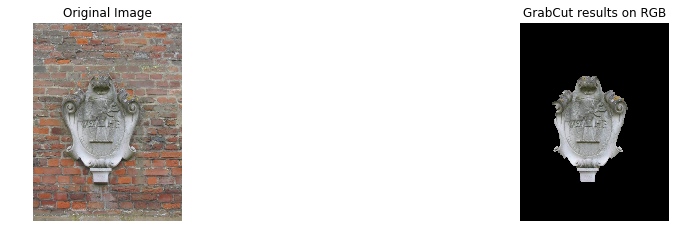

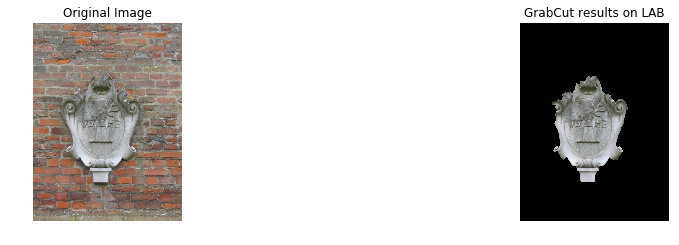

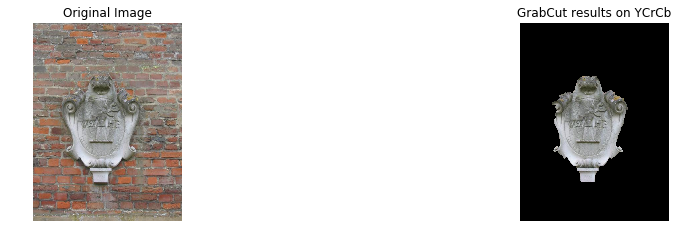

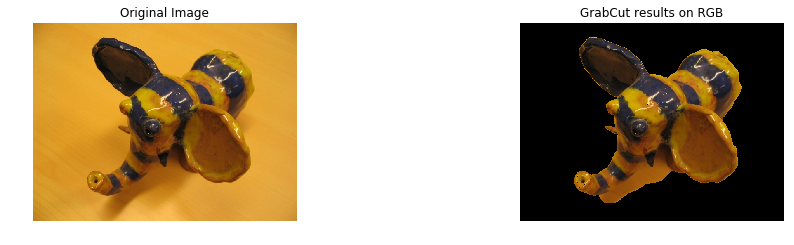

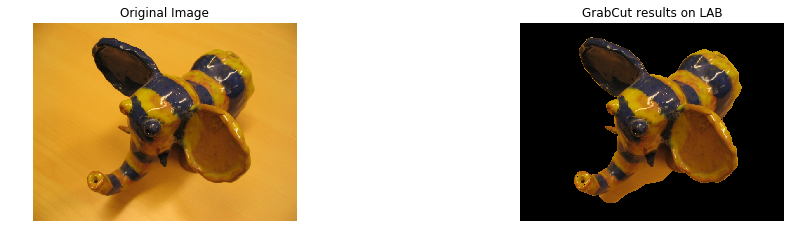

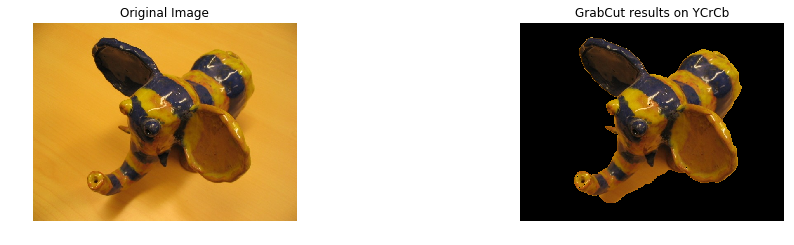

In [36]:
iterations = 4
cname = {
    4: 'RGB',
    44: 'LAB',
    36: 'YCrCb'
}
for img,coord in img_list[5:10]:    
    img = img.astype('uint8')
    x1,y1,x2,y2 = coord
    rect = (x1,y1,x2-x1,y2-y1)
    # Color spaces 
    for color_space in [cv2.COLOR_BGR2RGB, cv2.COLOR_BGR2LAB, cv2.COLOR_BGR2YCR_CB]:            
        mask = np.zeros(img.shape[:2],np.uint8)
        bgdModel = np.zeros((1,65),np.float64)
        fgdModel = np.zeros((1,65),np.float64)
        
        mask, bgdModel, fgdModel = cv2.grabCut(cv2.cvtColor(img, color_space),mask,rect,bgdModel,fgdModel,iterations,cv2.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        seg_img = img*mask2[:,:,np.newaxis]

        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(2,2,1)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title('Original Image')
        
        ax = fig.add_subplot(2,2,2)
        ax.imshow(cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title('GrabCut results on ' + cname[color_space])
        
        plt.show()

The color space seems to have less effect on the algorithm 

# Number of components for mixture model 

In [4]:
sys.path.append('../code/GrabCut/')
import warnings
from grabcut import GrabCut
warnings.filterwarnings('ignore')

(640, 480)


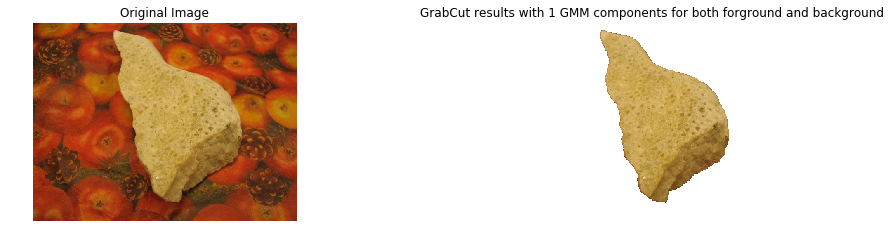

(640, 480)


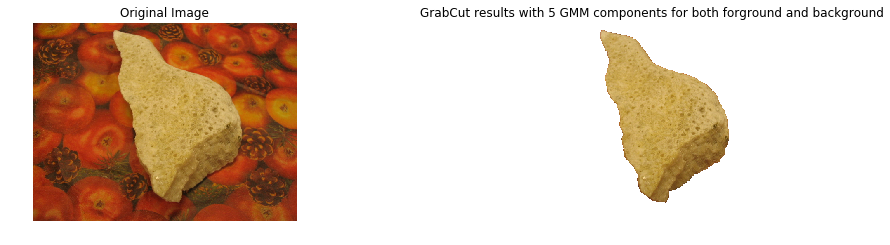

(640, 480)


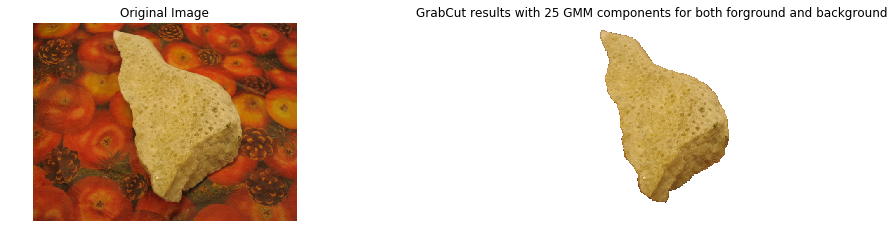

(462, 549)


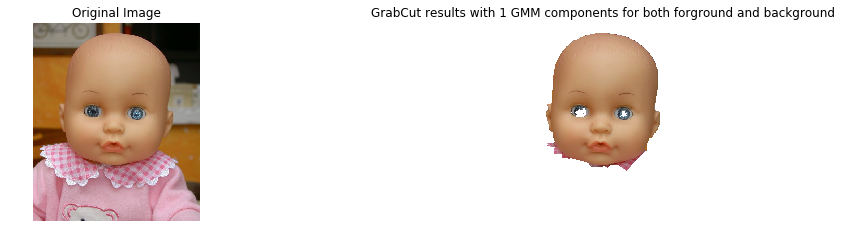

(462, 549)


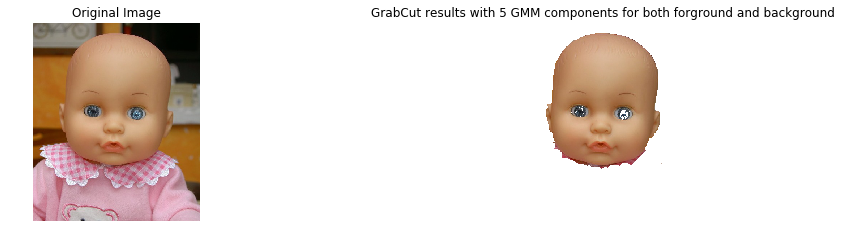

(462, 549)


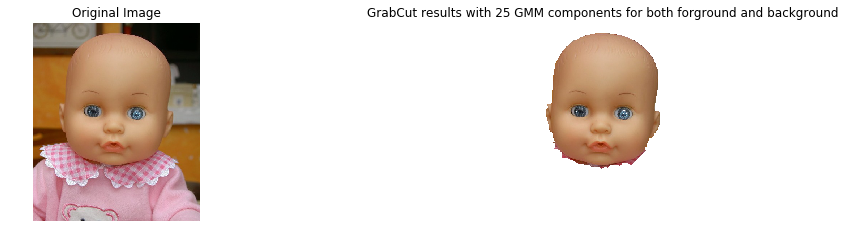

(442, 350)


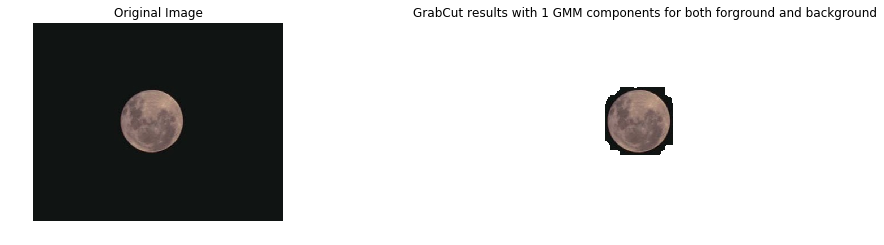

(442, 350)


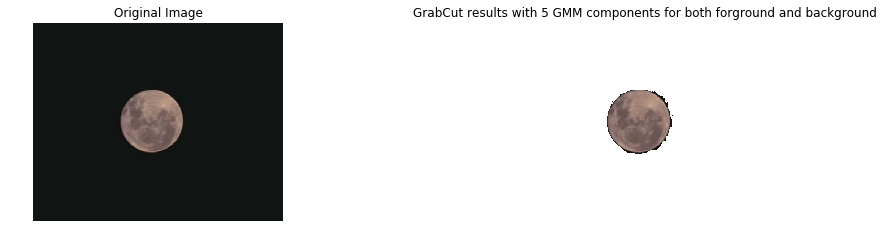

(442, 350)


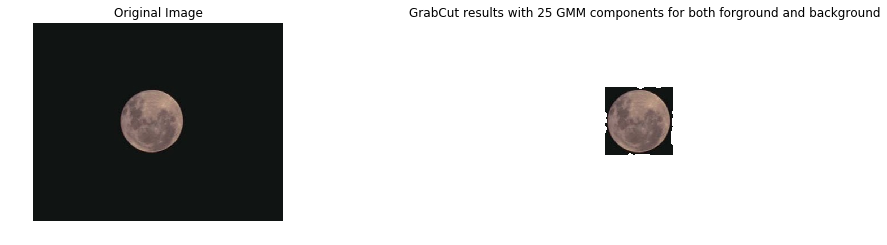

In [5]:
iterations = 1
for i,filename in enumerate(os.listdir(image_dir)[10:13]):    
    img = cv2.cvtColor(img_list[i+10][0], cv2.COLOR_BGR2RGB)
    x1,y1,x2,y2 = img_list[i+10][1]
    rect = (x1,y1,x2-x1,y2-y1)
    # Color spaces 
    for n_components in [1,5,25]:            
        mask = np.zeros(img.shape[:2],np.uint8)
        mask[y1:y2,x1:x2] = 2        

        seg_img = GrabCut(os.path.join(image_dir,filename),mask,iterations,n_components=n_components)

        fig = plt.figure(figsize=(16,8))
        ax = fig.add_subplot(2,2,1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Original Image')
        
        ax = fig.add_subplot(2,2,2)
        ax.imshow(seg_img)
        ax.axis('off')
        ax.set_title('GrabCut results with {} GMM components for both forground and background'.format(n_components))
        
        plt.show()

Here we can notice we get good result on 5 components. 
Number of components to use can be very vague can depends on the image and the forground

# Results on other images

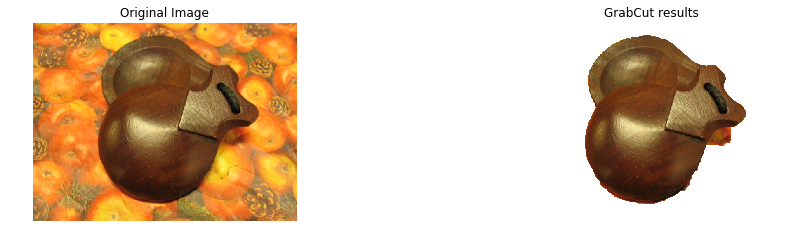

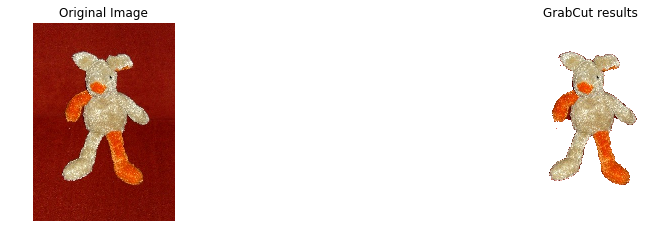

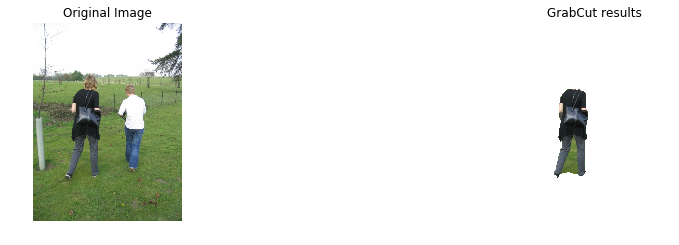

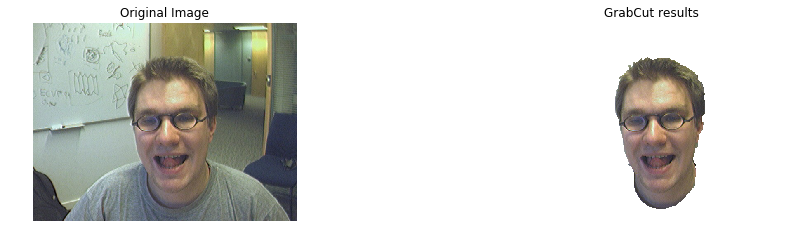

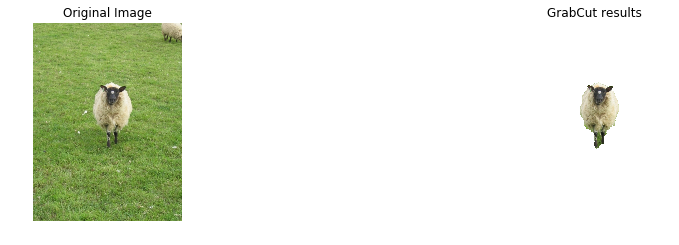

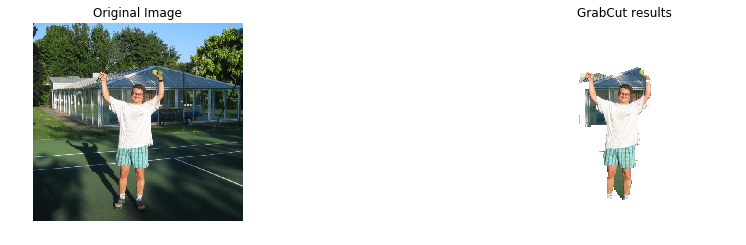

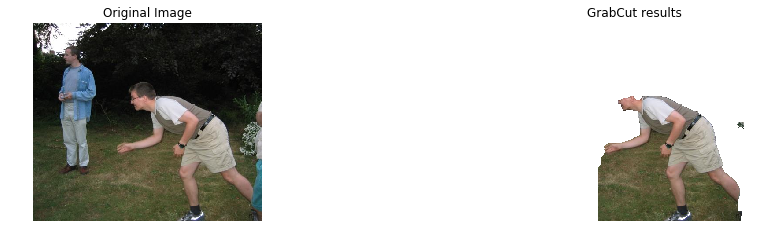

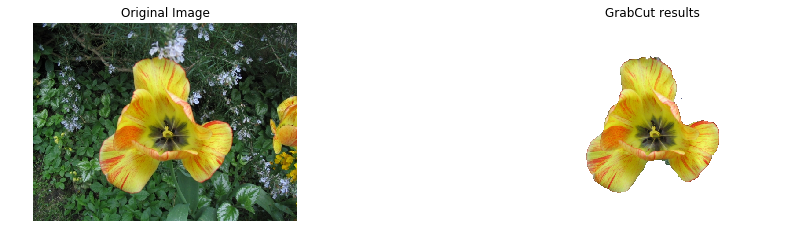

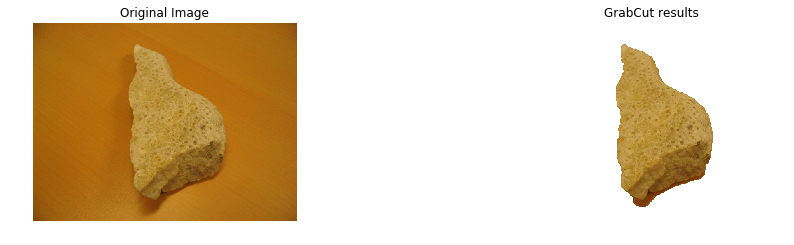

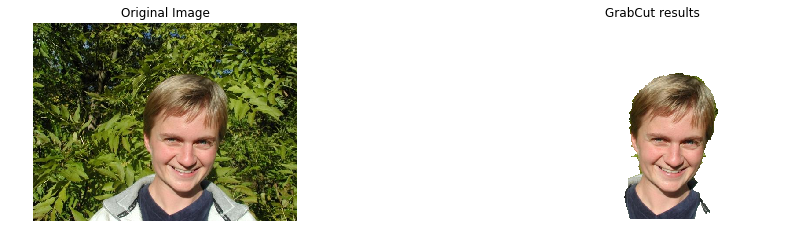

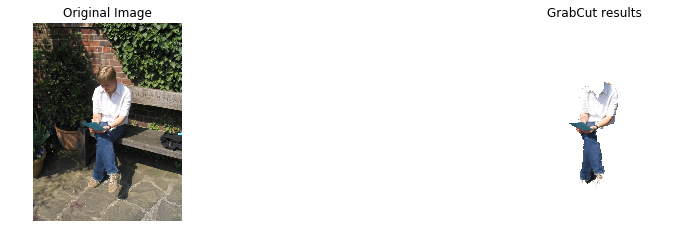

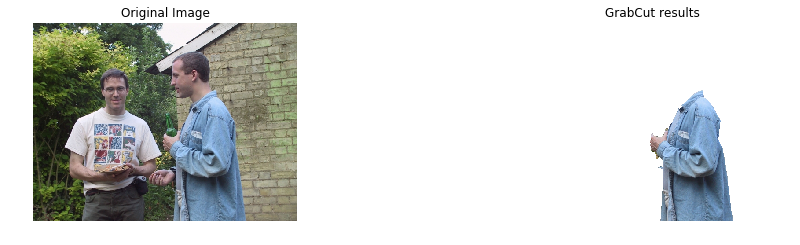

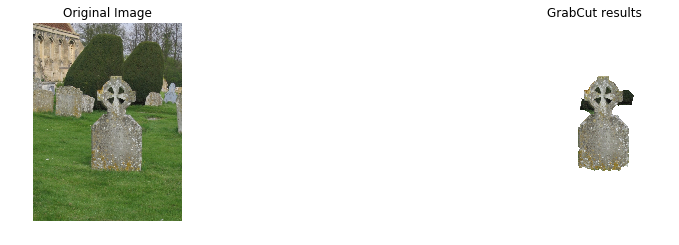

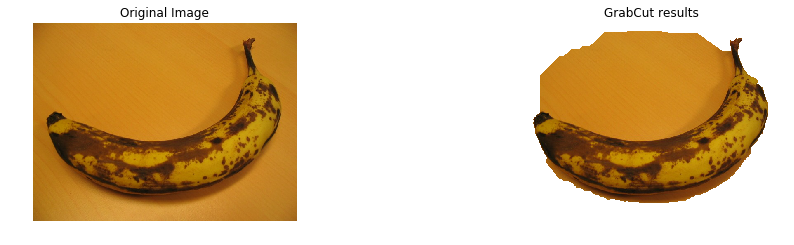

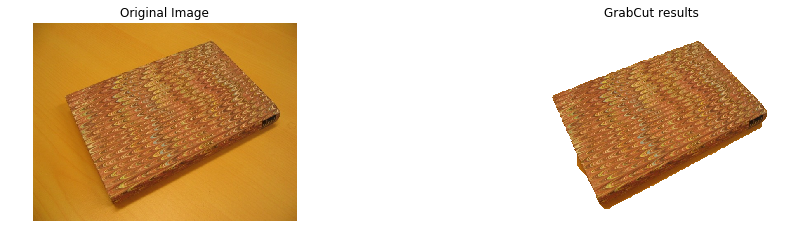

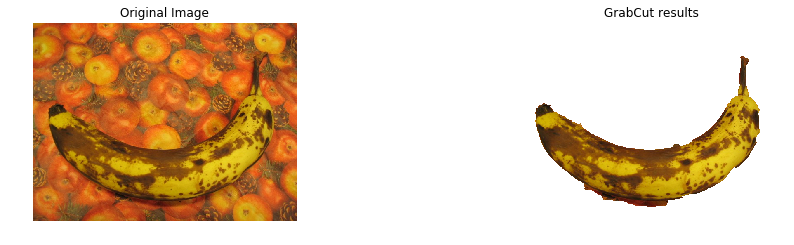

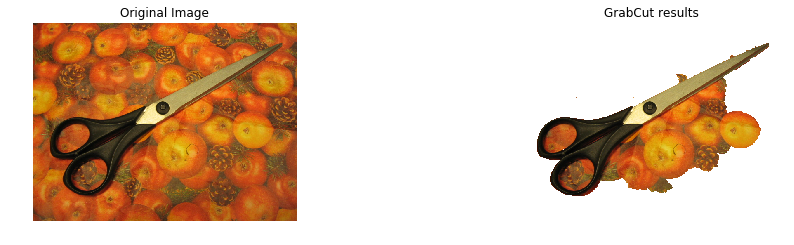

In [7]:
for i,filename in enumerate(os.listdir(image_dir)[13:]):    
    img = cv2.cvtColor(img_list[i+13][0], cv2.COLOR_BGR2RGB)
    x1,y1,x2,y2 = img_list[i+13][1]
    rect = (x1,y1,x2-x1,y2-y1)    
    mask = np.zeros(img.shape[:2],np.uint8)
    mask[y1:y2,x1:x2] = 2        

    seg_img = GrabCut(os.path.join(image_dir,filename),mask,1,n_components=5)

    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(2,2,1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title('Original Image')

    ax = fig.add_subplot(2,2,2)
    ax.imshow(seg_img)
    ax.axis('off')
    ax.set_title('GrabCut results')

    plt.show()